In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias
    #pass
  
  def forward(self, inputs):
    # <реализовать логику нейрона>
    return torch.sum(self.weights * inputs) + self.bias

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

my_neuron = Neuron(weights = weights, bias = bias)
my_neuron.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
    #pass
  
  def forward(self, inputs):
    # <реализовать логику слоя>
    return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)
    #pass
  
  def forward(self, inputs):
    # <реализовать логику слоя>
    return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear = Linear(n_features = 4, n_neurons = 3)
linear.forward(inputs)

tensor([[ -3.4638,  -0.1214,  -9.7173],
        [ -8.3364,   0.4715, -16.5157],
        [-10.3530,   5.5406,  -7.0155]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear_1 = Linear(n_features = 4, n_neurons = 3) 
linear_2 = Linear(n_features = 3, n_neurons = 7) 
linear_2.forward(linear_1.forward(inputs))

tensor([[ 14.5023,  12.0846, -11.3003,  18.8338,   3.6546,   2.9125,  14.1173],
        [ -7.9372,  12.0779, -13.9278,   0.3424, -14.1629,  24.0476,  15.4574],
        [ 13.8294,   8.1382,  -7.4454,  16.3616,   5.4836,  -2.2952,   9.2233]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

RELU - Выпрямленная линейная единица. Так мы решаем проблему исчезающего градиента

In [ ]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    mask = inputs < 0
    inputs[mask] = 0
    return inputs
    #pass

relu = ReLU()
matr = torch.randn((4, 3))
print("Input:\n", matr)
res = relu.forward(matr)
print("Output:\n", res)

Input:
 tensor([[-1.4291, -0.3716,  0.8409],
        [ 0.2128, -0.8688,  0.0029],
        [-0.9818, -0.7562,  1.2086],
        [ 0.4273, -1.2514, -0.3142]])
Output:
 tensor([[0.0000, 0.0000, 0.8409],
        [0.2128, 0.0000, 0.0029],
        [0.0000, 0.0000, 1.2086],
        [0.4273, 0.0000, 0.0000]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

Softmax()помогает нам изменить масштаб n-мерного тензора по определенной размерности

In [ ]:
class Softmax:
  def forward(self, inputs):
    # <реализовать логику Softmax>
    up = torch.exp(inputs)
    down = torch.sum(torch.exp(inputs), dim = 1).view(-1, 1)
    res = up / down
    return res
    #pass

softmax = Softmax()
matr = torch.randn((4, 3))
print("Input:\n", matr)

res = softmax.forward(matr)
print("Output:\n", res)

Input:
 tensor([[ 0.4566, -0.0044, -0.6117],
        [-0.4227, -0.5195, -0.3582],
        [ 0.3106,  0.4142, -1.4562],
        [-0.5476,  2.0575, -0.6644]])
Output:
 tensor([[0.5065, 0.3194, 0.1740],
        [0.3362, 0.3052, 0.3586],
        [0.4386, 0.4865, 0.0749],
        [0.0648, 0.8775, 0.0577]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

ELU - Экспоненциальная линейная единица. Эта функция активации устраняет некоторые проблемы с ReLU и сохраняет некоторые положительные моменты.

In [ ]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha
    #pass

  def forward(self, inputs):
    # <реализовать логику ReLU>
    inputs[inputs < 0] = (torch.exp(inputs[inputs < 0]) - 1) * self.alpha
    return inputs
    #pass

elu = ELU(alpha = 1)
matr = torch.randn((4, 3))
print("Input:\n", matr)

res = elu.forward(matr)
print("Output:\n", res)

Input:
 tensor([[ 0.5530,  0.1946,  0.0190],
        [-1.0565, -1.0512,  1.3789],
        [ 1.5419,  0.4838, -0.0675],
        [ 0.4252,  1.2731, -0.1955]])
Output:
 tensor([[ 0.5530,  0.1946,  0.0190],
        [-0.6523, -0.6505,  1.3789],
        [ 1.5419,  0.4838, -0.0652],
        [ 0.4252,  1.2731, -0.1776]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

MSE широко используется в линейной регрессии в качестве показателя эффективности. Чтобы рассчитать MSE, надо взять разницу между предсказанными значениями и истинными, возвести ее в квадрат и усреднить по всему набору данных.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    return ((y_true - y_pred) ** 2).mean()

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])
# слой с одним нероном
linear_layer = Linear(4, 1)

mse_loss = MSELoss()
res = mse_loss.forward(linear_layer.forward(inputs), y)
print(f'MSE: {res}')

MSE: 6.41961669921875


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

CCE - метрика, позволяющая оценить, насколько хорошо функционирует модель классификации в машинном обучении.

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
    return -1 * (y_true * torch.log(y_pred)).sum(1)
    #pass

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3) #Слой с 3 нейронами

softmax = Softmax()
cce_loss = CategoricalCrossentropyLoss()
res = cce_loss.forward(softmax.forward(linear_layer.forward(inputs)), y)
print(f'CCE loss: {res}')

CCE loss: tensor([3.3493, 8.8195, 1.9476])


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
  def __init__(self, lambda_, layer, W=0.1):
    # <создать атрибут объекта alpha>
    self.lambda_ = lambda_
    self.layer = layer
    self.layer.W = W
    #pass

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return (y_true - y_pred) ** 2
    #pass

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    return self.lambda_ * (layer.W ** 2)
    #pass

  def forward(self, y_pred, y_true):
    return self.data_loss(y_pred, y_true) + self.reg_loss(self.layer)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

linear_layer = Linear(4, 3)
layer_out = linear_layer.forward(inputs)

softmax = Softmax()
mse_loss = MSELossL2(1.5, linear_layer)
res = mse_loss.forward(softmax.forward(layer_out), y)
print(f'MSE loss: {res}')

MSE loss: tensor([[0.7419, 0.0150, 0.7416],
        [0.8907, 0.0150, 0.8806],
        [1.0113, 0.0150, 1.0113]])


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.tensor(y, dtype=torch.float32).view(-1, 1) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) # df/dc

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs: int):
    # <создать атрибуты объекта weights и bias>
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
    #pass
  
  def forward(self, inputs):
    self.inputs = inputs
    return (self.inputs * self.weights).sum() + self.bias # <реализовать логику нейрона>
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.inputs # df/dW
    self.dinput =  dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])

naive_neuron = Neuron(4)
out = naive_neuron.forward(inputs)
print(out)

tensor([-6.9994])


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
import numpy as np
#Устанавливаем начальное число для генерации случайных чисел
torch.manual_seed(0)

In [ ]:
print(y.size())
print(X.size())

torch.Size([100, 1])
torch.Size([100, 4])


In [ ]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>4
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [ ]:
losses[::1000]

[tensor([2636.1833]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11])]

In [ ]:
losses[:1000:20]

[tensor([2636.1833]),
 tensor([2487.7996]),
 tensor([1.5241]),
 tensor([0.0955]),
 tensor([0.0045]),
 tensor([0.0001]),
 tensor([0.0001]),
 tensor([3.0126e-06]),
 tensor([1.1014e-07]),
 tensor([1.4901e-08]),
 tensor([2.8522e-09]),
 tensor([2.3283e-10]),
 tensor([1.1005e-10]),
 tensor([0.]),
 tensor([0.]),
 tensor([1.3097e-10]),
 tensor([0.]),
 tensor([1.4552e-11]),
 tensor([3.2742e-11]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([0.]),
 tensor([9.0949e-11]),
 tensor([3.6380e-12]),
 tensor([0.]),
 tensor([1.3097e-10]),
 tensor([0.]),
 tensor([1.4552e-11]),
 tensor([1.4552e-11]),
 tensor([0.]),
 tensor([1.3097e-10]),
 tensor([2.3283e-10]),
 tensor([1.2451e-09]),
 tensor([9.0949e-11]),
 tensor([5.2387e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([1.3133e-09]),
 tensor([9.0949e-11]),
 tensor([5.2387e-10]),
 tensor([1.4552e-11]),
 tensor([2.3283e-10]),
 tensor([1.3133e-09]),
 tensor([9.0949e-11]),
 tensor([5.2387e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tens

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.2.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.n_inputs = n_inputs
    self.weights = torch.randn(1, n_inputs).T
    self.bias = torch.randn(1)
    pass
  
  def forward(self, inputs):
    self.inputs = inputs
    # <реализовать логику нейрона>
    return torch.matmul(inputs, self.weights) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dinputs = torch.matmul(dvalue, self.weights.T)
    self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
    self.dbias = torch.sum(dvalue) # df/db

2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()
losses = []

for epoch in range(1000):
    # forward pass
    y_pred = neuron.forward(X) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
    
losses[::20]

[tensor(4575.1108),
 tensor(2122.9668),
 tensor(992.6731),
 tensor(466.9208),
 tensor(220.6329),
 tensor(104.6253),
 tensor(49.7506),
 tensor(23.7079),
 tensor(11.3168),
 tensor(5.4092),
 tensor(2.5883),
 tensor(1.2396),
 tensor(0.5941),
 tensor(0.2849),
 tensor(0.1367),
 tensor(0.0656),
 tensor(0.0315),
 tensor(0.0151),
 tensor(0.0073),
 tensor(0.0035),
 tensor(0.0017),
 tensor(0.0008),
 tensor(0.0004),
 tensor(0.0002),
 tensor(8.9723e-05),
 tensor(4.3167e-05),
 tensor(2.0785e-05),
 tensor(1.0022e-05),
 tensor(4.8163e-06),
 tensor(2.3283e-06),
 tensor(1.1202e-06),
 tensor(5.3509e-07),
 tensor(2.7759e-07),
 tensor(1.3451e-07),
 tensor(6.6808e-08),
 tensor(3.8434e-08),
 tensor(3.0890e-08),
 tensor(3.0497e-08),
 tensor(3.0274e-08),
 tensor(3.0243e-08),
 tensor(3.0182e-08),
 tensor(3.0121e-08),
 tensor(3.0211e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08)]

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.n_features = n_features
    self.n_neurons = n_neurons
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(n_neurons)
    #pass
  
  def forward(self, inputs):
    self.inputs = inputs
    # <реализовать логику слоя>
    return torch.matmul(inputs, self.weights) + self.biases 

  def backward(self, dvalues):
    self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
    self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
    self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(4483.4761),
 tensor(2082.8269),
 tensor(974.4116),
 tensor(458.3700),
 tensor(216.5469),
 tensor(102.6464),
 tensor(48.7844),
 tensor(23.2339),
 tensor(11.0837),
 tensor(5.2945),
 tensor(2.5318),
 tensor(1.2118),
 tensor(0.5804),
 tensor(0.2782),
 tensor(0.1334),
 tensor(0.0640),
 tensor(0.0307),
 tensor(0.0147),
 tensor(0.0071),
 tensor(0.0034),
 tensor(0.0016),
 tensor(0.0008),
 tensor(0.0004),
 tensor(0.0002),
 tensor(8.7337e-05),
 tensor(4.1980e-05),
 tensor(2.0216e-05),
 tensor(9.7289e-06),
 tensor(4.6952e-06),
 tensor(2.2588e-06),
 tensor(1.0884e-06),
 tensor(5.1875e-07),
 tensor(2.6817e-07),
 tensor(1.3114e-07),
 tensor(6.5109e-08),
 tensor(3.7389e-08),
 tensor(3.0832e-08),
 tensor(3.0537e-08),
 tensor(3.0244e-08),
 tensor(3.0218e-08),
 tensor(3.0179e-08),
 tensor(3.0235e-08),
 tensor(3.0210e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08),
 tensor(3.0244e-08)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1) #возвращаем одномерный тензор шагов,равномерно распределенных по точкам между началом и концом
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output
  
    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

  data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(y_pred)
  
  # <backprop> 
  # loss > fc2 > relu1 > fc1
  loss.backward(y_pred, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  # <шаг оптимизации для fc1>
  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases
  
  # <шаг оптимизации для fc2>
  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 0.700754702091217
epoch 200 mean loss 0.01805739291012287
epoch 400 mean loss 0.009694485925137997
epoch 600 mean loss 0.0072747524827718735
epoch 800 mean loss 0.0062596844509243965
epoch 1000 mean loss 0.005669752135872841
epoch 1200 mean loss 0.005189425311982632
epoch 1400 mean loss 0.004744383040815592
epoch 1600 mean loss 0.0044317180290818214
epoch 1800 mean loss 0.004009791649878025
epoch 2000 mean loss 0.0033867722377181053


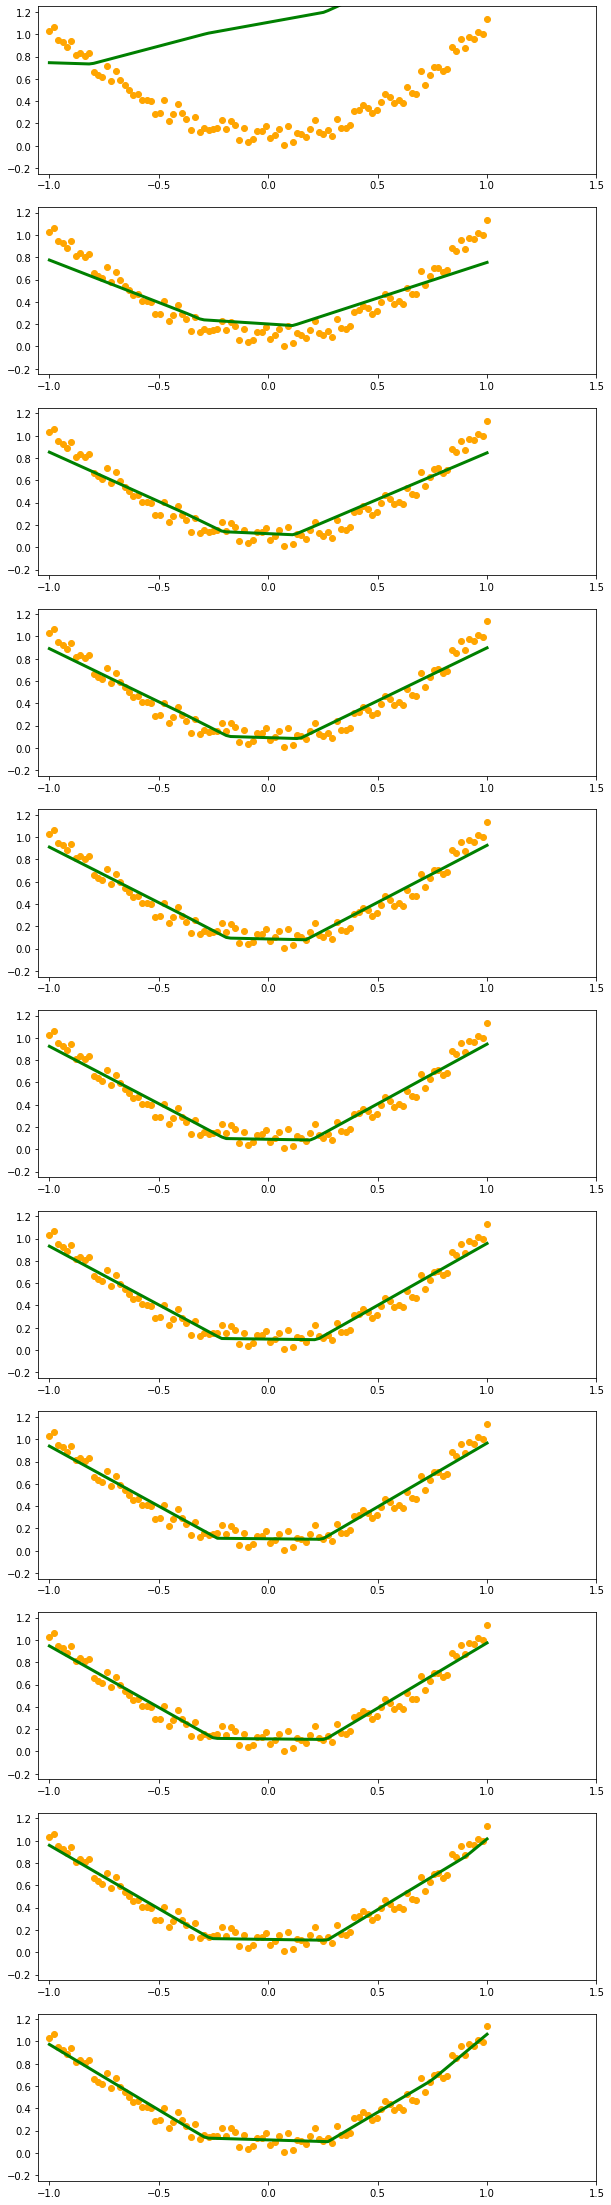

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)